In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
iris = load_iris()

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
x = iris.data

In [6]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
y = iris.target

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# We use Logistic Regression first

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
model = LogisticRegression()

In [12]:
model.fit(x_train, y_train)

/usr/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
model.score(x_test, y_test)

0.9777777777777777

In [14]:
predict = model.predict(x_test)

In [15]:
predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [16]:
cm = confusion_matrix(y_test, predict)

In [17]:
cm

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

In [18]:
sepal_length = float(input("Enter the sepal length:"))
sepal_width = float(input("Enter the sepal_width:"))
petal_length = float(input("Enter the petal length:"))
petal_width = float(input("Enter the petal width:"))

new_data = [[sepal_length, sepal_width, petal_length, petal_width]]

prediction = model.predict(new_data)
species = iris.target_names[prediction]
print(f"the Predicted Species for the Given value of {sepal_length} is {species}")

Enter the sepal length: 1
Enter the sepal_width: 1
Enter the petal length: 1
Enter the petal width: 1


the Predicted Species for the Given value of 1.0 is ['setosa']


# Now we use DecisionTreeClassifier

In [19]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=6,random_state=45)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9777777777777777

In [20]:
predict=model.predict(x_test)

In [21]:
predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [22]:
cm = confusion_matrix(y_test, predict)

In [23]:
cm

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

In [24]:
sepal_length = float(input("Enter the sepal length:"))
sepal_width = float(input("Enter the sepal_width:"))
petal_length = float(input("Enter the petal length:"))
petal_width = float(input("Enter the petal width:"))

new_data = [[sepal_length, sepal_width, petal_length, petal_width]]

prediction = model.predict(new_data)
species = iris.target_names[prediction]
print(f"the Predicted Species for the Given value of {sepal_length} is {species}")

Enter the sepal length: 1
Enter the sepal_width: 2
Enter the petal length: 3
Enter the petal width: 4


the Predicted Species for the Given value of 1.0 is ['virginica']


# Now we use RandomForestClassifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
model = RandomForestClassifier()

In [27]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [28]:
model.score(x_test, y_test)

0.9777777777777777

In [29]:
predict=model.predict(x_test)

In [30]:
predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [31]:
cm = confusion_matrix(y_test, predict)

In [32]:
cm

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

In [33]:
sepal_length = float(input("Enter the sepal length:"))
sepal_width = float(input("Enter the sepal_width:"))
petal_length = float(input("Enter the petal length:"))
petal_width = float(input("Enter the petal width:"))

new_data = [[sepal_length, sepal_width, petal_length, petal_width]]

prediction = model.predict(new_data)
species = iris.target_names[prediction]
print(f"the Predicted Species for the Given value of {sepal_length} is {species}")

Enter the sepal length: 10
Enter the sepal_width: 10
Enter the petal length: 10
Enter the petal width: 10


the Predicted Species for the Given value of 10.0 is ['virginica']


# Finally, we use KMeans Clustering

In [34]:
from sklearn.cluster import KMeans

In [35]:
x = iris.data

In [36]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [37]:
kmeans = KMeans(n_clusters = 3, random_state = 42)

In [38]:
kmeans.fit(x)

/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [39]:
prediction = kmeans.predict(x)

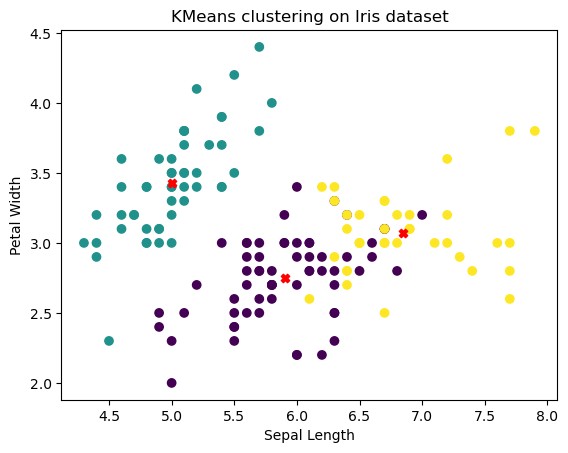

In [40]:
plt.scatter(x[:,0], x[:,1], c = prediction)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c = 'r', marker = 'X')
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")
plt.title("KMeans clustering on Iris dataset")
plt.show()

In [41]:
sepal_length = float(input("Enter the sepal length:"))
sepal_width = float(input("Enter the sepal_width:"))
petal_length = float(input("Enter the petal length:"))
petal_width = float(input("Enter the petal width:"))

new_data = [[sepal_length, sepal_width, petal_length, petal_width]]

prediction = kmeans.predict(new_data)
species = iris.target_names[prediction]
print(f"the Predicted Species for the Given value of {sepal_length} is {species}")

Enter the sepal length: 10
Enter the sepal_width: 10
Enter the petal length: 10
Enter the petal width: 10


the Predicted Species for the Given value of 10.0 is ['virginica']
